In [1]:
import numpy as np

# Define x[n]: 1 at n = 0,1,2,3,4
x = np.zeros(30)
x[0:5] = 1

# Define h[n]: 1 at n = 2-7 and 11-16
h = np.zeros(30)
h[2:8] = 1
h[11:17] = 1

# Perform discrete-time convolution
y = np.convolve(x, h)

# Print results
n_x = np.arange(len(x))
n_h = np.arange(len(h))
n_y = np.arange(len(y))

# Display results
print("x[n]:", x)
print("h[n]:", h)
print("y[n] = x[n] * h[n]:", y)

x[n]: [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
h[n]: [0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
y[n] = x[n] * h[n]: [0. 0. 1. 2. 3. 4. 5. 5. 4. 3. 2. 2. 2. 3. 4. 5. 5. 4. 3. 2. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


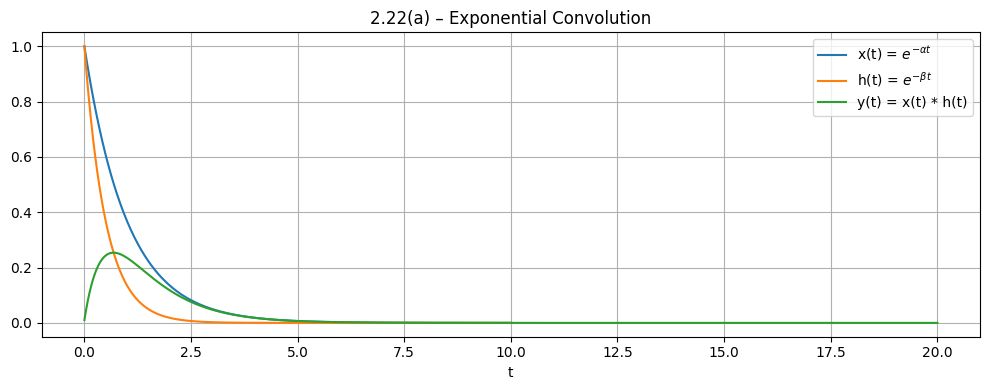

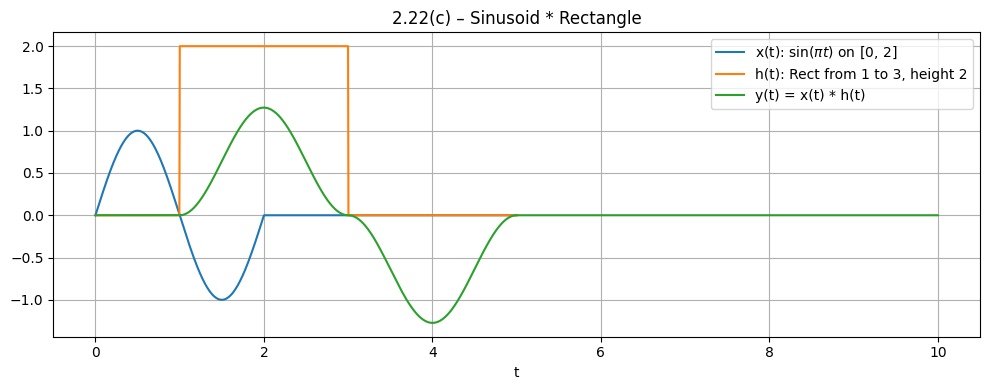

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# --- 2.22(a): Exponential convolution ---
t = np.linspace(0, 10, 1000)
alpha = 1
beta = 2

x_a = np.exp(-alpha * t)
h_a = np.exp(-beta * t)
y_a = convolve(x_a, h_a, mode='full') * (t[1] - t[0])
t_conv = np.linspace(0, 2 * t[-1], len(y_a))

plt.figure(figsize=(10, 4))
plt.plot(t, x_a, label='x(t) = $e^{-\\alpha t}$')
plt.plot(t, h_a, label='h(t) = $e^{-\\beta t}$')
plt.plot(t_conv, y_a, label='y(t) = x(t) * h(t)')
plt.title("2.22(a) – Exponential Convolution")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.tight_layout()

# --- 2.22(c): Sin and Rect ---
t2 = np.linspace(0, 5, 1000)
x_c = np.where((t2 >= 0) & (t2 <= 2), np.sin(np.pi * t2), 0)
h_c = np.where((t2 >= 1) & (t2 <= 3), 2, 0)

y_c = convolve(x_c, h_c, mode='full') * (t2[1] - t2[0])
t_c = np.linspace(0, 2 * t2[-1], len(y_c))

plt.figure(figsize=(10, 4))
plt.plot(t2, x_c, label='x(t): $\sin(\pi t)$ on [0, 2]')
plt.plot(t2, h_c, label='h(t): Rect from 1 to 3, height 2')
plt.plot(t_c, y_c, label='y(t) = x(t) * h(t)')
plt.title("2.22(c) – Sinusoid * Rectangle")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

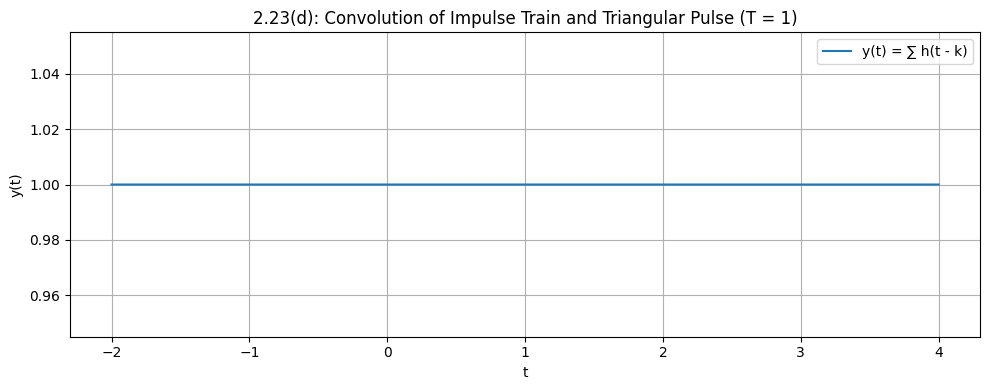

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(-2, 4, 4000)

# Define a single triangle h(t)
def h(t):
    return np.where(np.abs(t) <= 1, 1 - np.abs(t), 0)

# Build y(t) = sum of shifted triangles h(t - k)
y = np.zeros_like(t)
k_vals = np.arange(-5, 6)  # Sum over multiple shifts to capture overlap
for k in k_vals:
    y += h(t - k)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, y, label='y(t) = ∑ h(t - k)')
plt.title("2.23(d): Convolution of Impulse Train and Triangular Pulse (T = 1)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()